<a href="https://colab.research.google.com/github/chenyq121/760-2022S2/blob/main/baselineCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Streaming output truncated to the last 5000 lines.
loss: 0.6916837096214294 acc: 0.578125
loss: 0.7028172612190247 acc: 0.484375
loss: 0.6706318259239197 acc: 0.625
loss: 0.7121027112007141 acc: 0.421875
loss: 0.6747427582740784 acc: 0.6279069781303406
6 epoch:
loss: 0.6997249722480774 acc: 0.484375
loss: 0.7035276889801025 acc: 0.46875
loss: 0.7020555138587952 acc: 0.484375
loss: 0.6875734329223633 acc: 0.59375
loss: 0.6924648880958557 acc: 0.53125
loss: 0.6943285465240479 acc: 0.453125
loss: 0.6993613839149475 acc: 0.40625
loss: 0.6997408270835876 acc: 0.40625
loss: 0.6976844668388367 acc: 0.421875
loss: 0.6895115971565247 acc: 0.546875
loss: 0.6938573122024536 acc: 0.5
loss: 0.6849583387374878 acc: 0.578125
loss: 0.702059805393219 acc: 0.484375
loss: 0.6764366626739502 acc: 0.59375
loss: 0.699026346206665 acc: 0.515625
loss: 0.6882036924362183 acc: 0.5625
loss: 0.6917351484298706 acc: 0.546875
loss: 0.7059306502342224 acc: 0.484375
loss: 0.6737802028656006 acc: 0.609375
loss: 0.6741

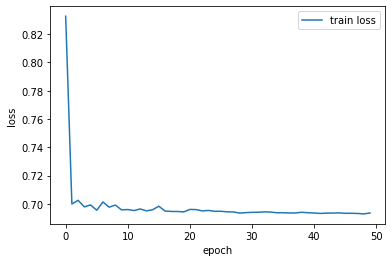

loss: 0.6947162747383118 top1: 0.515625
loss: 0.6942780613899231 top1: 0.5
loss: 0.6929824948310852 top1: 0.515625
loss: 0.6934543251991272 top1: 0.515625
loss: 0.6882228255271912 top1: 0.546875
loss: 0.6942294836044312 top1: 0.515625
loss: 0.6928773522377014 top1: 0.5
loss: 0.6840776205062866 top1: 0.640625
loss: 0.6906242370605469 top1: 0.609375
loss: 0.6910677552223206 top1: 0.515625
loss: 0.6973426342010498 top1: 0.453125
loss: 0.6924920678138733 top1: 0.5
loss: 0.6994762420654297 top1: 0.421875
loss: 0.6941256523132324 top1: 0.515625
loss: 0.6949383020401001 top1: 0.375
loss: 0.694808304309845 top1: 0.515625
loss: 0.6907851696014404 top1: 0.53125
loss: 0.6985392570495605 top1: 0.375
loss: 0.6887273788452148 top1: 0.625
loss: 0.6969221830368042 top1: 0.34375
loss: 0.6909453868865967 top1: 0.59375
loss: 0.6891922950744629 top1: 0.515625
loss: 0.6953386068344116 top1: 0.40625
loss: 0.6895990371704102 top1: 0.625
loss: 0.6931554079055786 top1: 0.53125
loss: 0.696571409702301 top1: 0.4

In [5]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torchvision
import os
import torch.utils.data
import matplotlib.pyplot as plt
from PIL import Image

# data processing 
class ClassifyDataset(torch.utils.data.Dataset):
    def __init__(self,root_path,data_file,img_size=150):
        self.data_files=np.loadtxt(data_file,dtype=np.str)
        self.root_path=root_path
        self.class_list=os.listdir(
            os.path.join(root_path,'')
        )
        self.transforms=torchvision.transforms.Compose(
            [
                torchvision.transforms.Resize((img_size,img_size)), 
                torchvision.transforms.ToTensor()
            ]
        )

    def __getitem__(self, item):
        data_file=self.data_files[item]
        data_file=os.path.join(self.root_path,data_file)
        # get the image
        img=Image.open(data_file).convert('RGB') # three channels
        # get the label(in this case the label is the folder name)
        tmp=data_file.split('/')
        label_name=tmp[-2]
        #print("label_name:",label_name)
        label=self.class_list.index(label_name)
        #print("label:",label)
        # prepare the images and label
        img=self.transforms(img)
        label=torch.tensor(label)
        #print("torch_label:",label)
        return img,label

    def __len__(self):
        return len(self.data_files)

# model building
class CNet(nn.Module):
    def __init__(self,num_classes=21):
        super(CNet,self).__init__()
        self.conv1=nn.Sequential(
                #input, output, kernel size, step, padding
                nn.Conv2d(3, 32, 5, 1, padding=1),
                nn.BatchNorm2d(32), # batch normalization
                nn.ReLU()
        )
        self.conv2 = nn.Sequential(
                nn.Conv2d(32, 64, 5, 1, padding=1),
                nn.BatchNorm2d(64),
                nn.ReLU()
    )
        self.conv3 = nn.Sequential(
                nn.Conv2d(64, 128, 5, 1, padding=1),
                nn.BatchNorm2d(128),
                nn.ReLU()
        )
        self.pool = nn.AvgPool2d(2, 2)
        self.fclayer=nn.Sequential(
                nn.Linear(128, 256),
                nn.ReLU(),
                nn.Linear(256, num_classes)
        )
        self.avg_pool=nn.AdaptiveAvgPool2d((1, 1))
        self.softmax=nn.Softmax(dim=1)

    def forward(self,x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.pool(x)
        x = self.avg_pool(x)
        x = torch.flatten(x,1)
        logits=self.fclayer(x)
        prob=self.softmax(logits)
        return logits,prob


# training
def training(model,root_path,train_data_file,batch_size,lr):
    # get training data
    train_dataset=ClassifyDataset(root_path,train_data_file)
    train_dataloader=torch.utils.data.DataLoader(train_dataset,batch_size,shuffle=True,num_workers=0)
    # loss function and optimizer
    criterion=nn.CrossEntropyLoss()
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)

    # epoch number
    epoch_num=50
    total_loss=[]

    for epoch in range(epoch_num):
        print(epoch+1,"epoch:")
        total_train_loss=0
        res_num=len(train_dataset)
        for data in train_dataloader:
            if (res_num - batch_size) > 0:
                cnt=batch_size
                res_num = res_num - batch_size
            else:
                cnt=res_num
                res_num = 0

            ## GPU
            train_img,train_label=data
            train_img=train_img.to(device)
            train_label=train_label.to(device)

            ## get loss result
            train_logits,train_prob=model(train_img)
            train_loss=criterion.forward(train_logits,train_label)

            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
            
            train_pred=torch.argmax(train_prob,dim=1)
            train_acc=(train_pred==train_label).float()
            train_acc=torch.mean(train_acc)
            print('loss:',train_loss.item(), 'acc:', train_acc.item())
            total_train_loss=total_train_loss+train_loss*cnt

        total_train_loss=total_train_loss/len(train_dataset)
        total_loss.append(total_train_loss.item())

    state_dict=model.state_dict()
    torch.save(state_dict,'/content/drive/Shareddrives/760/model/model_50_epoch_150_lr0.001.pth')

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(total_loss)
    plt.legend(['train loss'])
    plt.show()

# test
def test(model,root_path,test_data_file):
    state_dict = torch.load('/content/drive/Shareddrives/760/model/model_50_epoch_150_lr0.001.pth')
    model.load_state_dict(state_dict)
    model.eval() # no BatchNormalization and Dropout

    test_dataset=ClassifyDataset(root_path,test_data_file)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=True, num_workers=0)

    criterion = nn.CrossEntropyLoss()

    res_num=len(test_dataset)
    total_acc=0

    for data in test_dataloader:
      with torch.no_grad():

        if (res_num-batch_size)>0:
            cnt=batch_size
            res_num = res_num - batch_size
        else:
            cnt=res_num
            res_num = 0

        test_img,test_label=data
        test_img=test_img.to(device)
        test_label=test_label.to(device)

        test_logits,test_prob=model(test_img)
        test_loss=criterion.forward(test_logits,test_label)

        # Top1 accuracy: correct number/total number
        test_pred = torch.argmax(test_prob, dim=1)
        # print(test_pred)
        # print(test_label)
        test_acc = (test_pred == test_label).float()
        # print(test_acc)
        test_acc = torch.mean(test_acc)
        total_acc = total_acc + test_acc * cnt

        print('loss:',test_loss.item(), 'top1:',test_acc.item() )

    total_acc=total_acc/len(test_dataset)

    print('\n')
    print('Top-1 Accuracy:',total_acc.item())

# main function
if __name__ == '__main__':

    root_path = r'/content/drive/Shareddrives/760/Data/'
    train_data_file=r'/content/drive/Shareddrives/760/Data/train.txt'
    test_data_file=r'/content/drive/Shareddrives/760/Data/test.txt'
    batch_size=64
    lr=0.001 #learning rate
    device='cuda:0'
    # get model and put model on the device
    model=CNet()
    model.to(device)

    training(model,root_path,train_data_file,batch_size,lr)
   # torch.cuda.empty_cache()
    test(model,root_path,test_data_file)



In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()


606

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
price = pd.read_csv('/content/drive/Shareddrives/760/Data/price_cleaned.csv')
